In [1]:
# Task 8: Clustering with K-Means

In [66]:
import os
os.environ["OMP_NUM_THREADS"]="1"

In [98]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [99]:
#  1.Load and visualize dataset (optional PCA for 2D view).

In [100]:
# importing libraries

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [102]:
#  loading dataset

In [103]:
df=pd.read_csv("C:/Users/HP/Downloads/archive (6)/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [104]:
# exploring dataset info

In [105]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [106]:
df.shape

(200, 5)

In [107]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [108]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [110]:
df.isna()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [111]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [112]:
# processing for PCA

In [113]:
df['Gender']=df['Gender'].map({'Male': 0,'Female': 1})
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [114]:
X=df[['Age','Annual Income (k$)','Spending Score (1-100)']]
X

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [115]:
y=df['Gender']
y

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64

In [168]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [117]:
# Step 5: Apply PCA (2 components for 2D view)

In [118]:
from sklearn.decomposition import PCA

In [169]:
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X_scaled)
X_pca

array([[-6.15720019e-01, -1.76348088e+00],
       [-1.66579271e+00, -1.82074695e+00],
       [ 3.37861909e-01, -1.67479894e+00],
       [-1.45657325e+00, -1.77242992e+00],
       [-3.84652078e-02, -1.66274012e+00],
       [-1.48168526e+00, -1.73500173e+00],
       [ 1.09461665e+00, -1.56610230e+00],
       [-1.92630736e+00, -1.72111049e+00],
       [ 2.64517786e+00, -1.46084721e+00],
       [-9.70130513e-01, -1.63558108e+00],
       [ 2.49568861e+00, -1.47048914e+00],
       [-1.45688256e+00, -1.66436050e+00],
       [ 2.01018729e+00, -1.45329897e+00],
       [-1.41321072e+00, -1.61776746e+00],
       [ 1.00042965e+00, -1.49579176e+00],
       [-1.56943170e+00, -1.62502669e+00],
       [ 2.94060318e-01, -1.49425585e+00],
       [-1.31624924e+00, -1.57216383e+00],
       [ 1.31669910e+00, -1.37243404e+00],
       [-1.43679899e+00, -1.51039469e+00],
       [ 2.88561175e-01, -1.37988135e+00],
       [-1.26018513e+00, -1.45723906e+00],
       [ 1.66684303e+00, -1.27396755e+00],
       [-9.

In [170]:
df_pca=pd.DataFrame(X_pca,columns=['PC1','PC2'])
df_pca['Gender']=y
y

0      0
1      0
2      1
3      1
4      1
      ..
195    1
196    1
197    0
198    0
199    0
Name: Gender, Length: 200, dtype: int64

In [121]:
#  Visualizing the Result

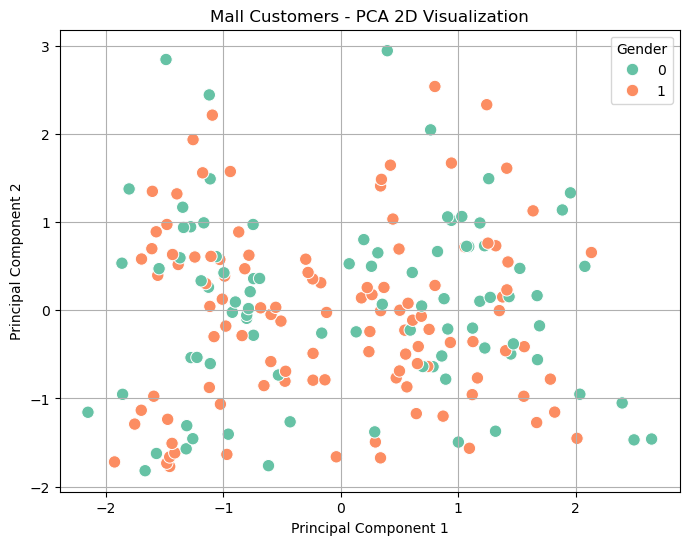

In [122]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca,x='PC1',y='PC2',hue='Gender',palette='Set2',s=80)
plt.title("Mall Customers - PCA 2D Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

In [123]:
# 2.Fit K-Means and assign cluster labels.

In [124]:
# importing library

In [125]:
from sklearn.cluster import KMeans

In [126]:
kmeans=KMeans(n_clusters=5,random_state=42,n_init='auto')
kmeans.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [171]:
y_kmeans=kmeans.fit_predict(X_scaled)
y_kmeans

array([5, 4, 5, 4, 5, 4, 5, 4, 8, 4, 8, 4, 8, 4, 5, 4, 5, 4, 8, 4, 5, 4,
       8, 4, 8, 4, 5, 4, 5, 4, 8, 4, 8, 4, 8, 4, 5, 4, 5, 4, 0, 4, 0, 6,
       8, 4, 0, 6, 6, 6, 0, 6, 6, 0, 0, 0, 0, 0, 6, 0, 0, 3, 0, 0, 0, 3,
       6, 0, 3, 6, 0, 0, 0, 0, 0, 6, 6, 6, 3, 0, 0, 6, 0, 0, 3, 0, 0, 3,
       6, 0, 0, 3, 0, 6, 6, 3, 0, 6, 0, 3, 3, 0, 0, 6, 0, 3, 0, 0, 0, 0,
       0, 3, 6, 3, 3, 3, 0, 0, 0, 0, 6, 6, 6, 1, 3, 1, 2, 1, 2, 1, 2, 1,
       3, 1, 3, 1, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 9, 7, 9, 7, 9, 7, 9, 7, 9, 7, 9, 7, 9, 7, 9, 7, 9, 7,
       9, 7])

In [150]:
cluster=kmeans.predict(X_scaled)
clusters = kmeans.labels_ 
df['Cluster'] = clusters

In [151]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,0,19,15,39,5
1,2,0,21,15,81,4
2,3,1,20,16,6,5
3,4,1,23,16,77,4
4,5,1,31,17,40,5
...,...,...,...,...,...,...
195,196,1,35,120,79,7
196,197,1,45,126,28,9
197,198,0,32,126,74,7
198,199,0,32,137,18,9


In [152]:
# 3.Use the Elbow Method to find optimal K.

In [153]:
# elbow method- Trying K from 1 to 10

In [154]:
inertias=[]
K_range=range(1, 11)

In [155]:
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

In [156]:
# plotting

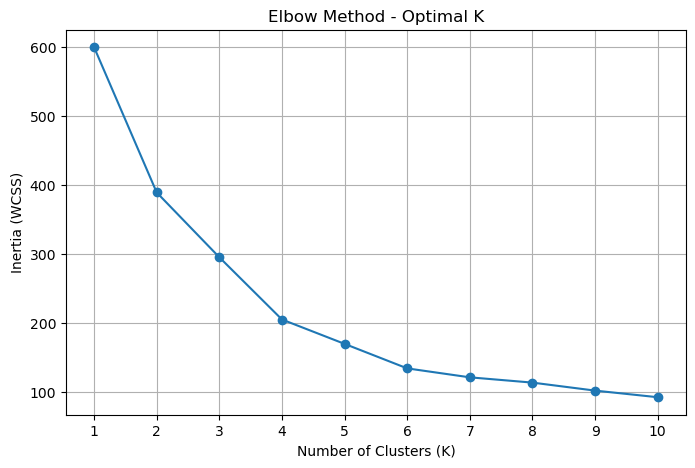

In [157]:
plt.figure(figsize=(8,5))
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method - Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia (WCSS)")
plt.grid(True)
plt.xticks(K_range)
plt.show()

from the above graph k values and its intertia values are :
k=1,intertia=600
k=2,intertia=398
k=3,intertia=300
k=4,intertia=200
k=5,intertia=170
k=6,intertia=150
k=7,intertia=130
k=8,intertia=120
k=9,intertia=100
k=10,intertia=98


-> Optimal k = 4
-> At k = 4:
     *Inertia has dropped steeply (from 600 → 200).
     *After that, the decrease becomes much smaller (only ~30 or less per step).
-> So, k = 4 is the “elbow point” — adding more clusters gives diminishing returns.


In [158]:
# 4.Visualize clusters with color-coding.

In [159]:
#  Plot clusters

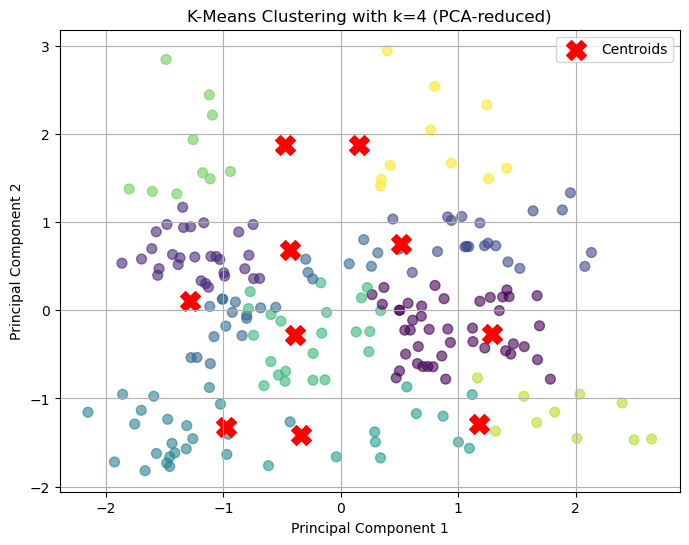

In [160]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', marker='X', s=200, label='Centroids')
plt.title('K-Means Clustering with k=4 (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

In [161]:
#  5.Evaluate clustering using Silhouette Score

In [162]:
# importing library

In [163]:
from sklearn.metrics import silhouette_score

In [174]:
kmeans_ss=KMeans(n_clusters=4,random_state=42)
cluster_labels=kmeans_ss.fit_predict(X_scaled)
cluster_labels

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2,
       2, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0,
       0, 2, 3, 2, 2, 2, 0, 0, 0, 0, 2, 3, 1, 1, 3, 1, 3, 1, 0, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [175]:
# Calculating silhouette score

In [176]:
score=silhouette_score(X_scaled,cluster_labels)
print(f"Silhouette Score for k=4: {score:.4f}")

Silhouette Score for k=4: 0.4040


In [179]:
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    labels=kmeans.fit_predict(X_scaled)
    score=silhouette_score(X_scaled,labels)
    print(f"k = {k}, Silhouette Score = {score:.4f}")

k = 2, Silhouette Score = 0.3355
k = 3, Silhouette Score = 0.3579
k = 4, Silhouette Score = 0.4040
k = 5, Silhouette Score = 0.4085
k = 6, Silhouette Score = 0.4311
k = 7, Silhouette Score = 0.4101
k = 8, Silhouette Score = 0.3674
k = 9, Silhouette Score = 0.3744
k = 10, Silhouette Score = 0.3619
